# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale = 1.3)


# Generating Data

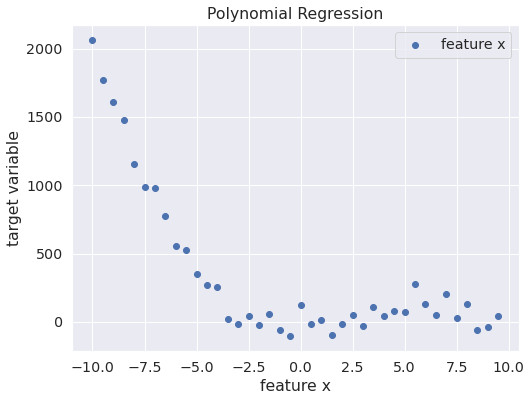

In [3]:
X = np.arange(-10,10,0.5)
noise = 80* np.random.randn(40)
y= -X**3 + 10*X**2 - 2*X + 3 + noise
X= X.reshape(40, 1)

plt.figure(figsize=(8,6))
plt.title('Polynomial Regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.legend()
plt.show()

# Linear Model

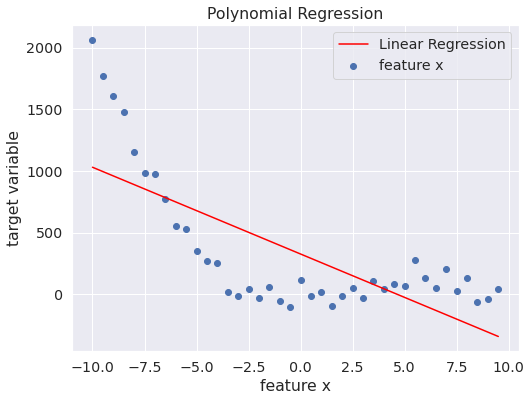

In [4]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)

plt.figure(figsize=(8,6))
plt.title('Polynomial Regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.plot(X, y_pred_lin, c='red', label = 'Linear Regression')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_lin)

0.5342822962632471

Model is underfitting \
$$ Y=w_0+w_1X_1$$ \
$$ Y=w_0+w_1X_1+w_2X^2_1 $$\
$$ Z=[1,X_1,X_1^2] $$ \
$$ Y=w_0 +w_1Z_1 + w_2Z_2 $$


# Extraction of polynomial features - degree 2

In [7]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head(10)

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0
5,-7.5
6,-7.0
7,-6.5
8,-6.0
9,-5.5


In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [9]:
X_poly.shape

(40, 3)

In [10]:
df= pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


# Model Fit

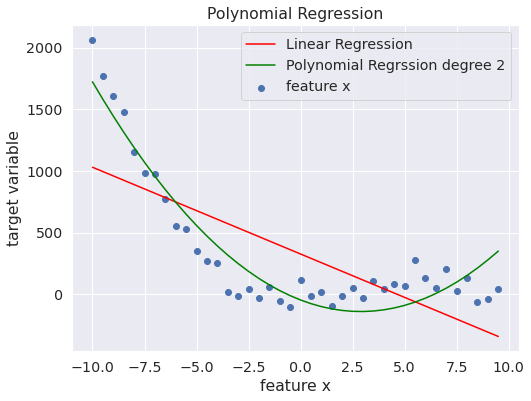

In [11]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred_2 = regressor_poly.predict(X_poly)

plt.figure(figsize=(8,6))
plt.title('Polynomial Regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.plot(X, y_pred_lin, c='red', label = 'Linear Regression')
plt.plot(X, y_pred_2, c='green', label='Polynomial Regrssion degree 2')
plt.legend()
plt.show()

In [13]:
r2_score(y, y_pred_2)

0.8951163003458433

# Extraction of polynomial features - degree 3

In [14]:
poly = PolynomialFeatures(degree=3)
X_poly_3 = poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

# Model Fit

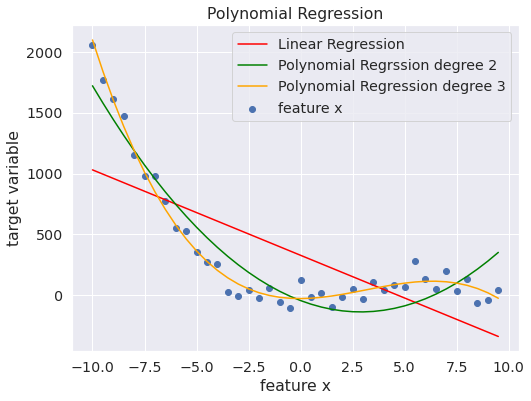

In [37]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly_3, y)

y_pred_3 = regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8,6))
plt.title('Polynomial Regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x')
plt.plot(X, y_pred_lin, c='red', label = 'Linear Regression')
plt.plot(X, y_pred_2, c='green', label='Polynomial Regrssion degree 2')
plt.plot(X, y_pred_3, c='orange', label='Polynomial Regression degree 3')
plt.legend()
plt.show()

In [38]:
r2_score(y, y_pred_3)

0.9841708613657418

In [39]:
r2_score(y, y_pred_lin)

0.5342822962632471

# Comparison of metrics

In [0]:
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error as mse 

In [41]:
results = pd.DataFrame(data={
    'name': ['Linear Regression', 'Polynomial Regression degree 2', 
             'Polynomial Regression degree 3'],
    'r2_score': [r2_score(y, y_pred_lin), r2_score(y, y_pred_2),
                 r2_score(y, y_pred_3)],
    'mae': [mae(y, y_pred_lin), mae(y, y_pred_2), mae(y, y_pred_3)],
    'mse': [mse(y, y_pred_lin), mse(y, y_pred_2), mse(y, y_pred_3)],
    'rmse': [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_2)), 
             np.sqrt(mse(y, y_pred_3))]    
    })
results

,name,r2_score,mae,mse,rmse
0,Linear Regression,0.534282,316.267126,143775.153332,379.176942
1,Polynomial Regression degree 2,0.895116,155.977929,32379.421866,179.942829
2,Polynomial Regression degree 3,0.984171,57.572030,4886.730343,69.905152


In [43]:
px.bar(results, x='name', y='r2_score', width=700, 
       title='Polynomial Regression - R2_score')

In [44]:
px.bar(results, x='name', y='mae', width=700, 
       title='Polynomial Regression - mean absolute error')

In [46]:
px.bar(results, x='name', y='mse', width=700, 
       title='Polynomial Regression - mean squared error')

In [45]:
px.bar(results, x='name', y='rmse', width=700, 
       title='Polynomial Regression - root mean squared error')